# Supervised learning

Supervised learning aims to predict labels of data using annotated examples. Supervised algorithms learn patterns on "tagged" data for later predicting the outcome of data which the model has not seen before. 

There are two branches in supervised learning:


*   **Classification:** learns and predicts discrete labels on the data (e.g. Diabetic/Healthy, Dead cell/Live cell...)  
*   **Regression:** predicts a continuous value based on the a set of explanatory variables (e.g. weight based on the height or age based on methylation pattern).

Two important concepts in supervised learning are **response variable** and the **predictive variables**. Supervised models aim to predict the response variable using the values from the predictor variables.



Let's look at examples:

The iris dataset contains information about 3 species of plants.

In [ ]:
# import packages
import numpy as np
import pandas as pd
from sklearn import datasets

# load dataset
iris_dataset = datasets.load_iris()

# create data frame with predictive and variables
iris_table = pd.DataFrame(data = iris_dataset['data'], 
                          columns = iris_dataset['feature_names'])

# add response variable to the table
iris_table['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

# show first five rows of the dataframe
iris_table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Another example is the diabetes dataset.

In [ ]:
# load dataset
diabetes_dataset = datasets.load_diabetes()

# create data frame with predictive variables
diabetes_table = pd.DataFrame(data = diabetes_dataset['data'],
                              columns = diabetes_dataset['feature_names'])

# add response variable to the table
diabetes_table['disease_progression'] = pd.Series(data = diabetes_dataset['target'])

# show first five rows of the dataframe
diabetes_table.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Regression

Regression algorithms learn the relationship between the predictor and the response variable. The output is a numeric value. 



## Simple linear regression

Simple linear regression tries to find the linear relationship between one predictor variable and the response variable. In other words it tries to find the line which best fits the training data. It follows the formula:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $\hat y$ = predicted value
* $x$ = predictor variable
* $\beta_1$ = model coefficient (slope of the line in simple linear regression)
* $\beta_0$ = bias term (intercept in simple linear regression)

Let's see a simple example with the iris dataset:



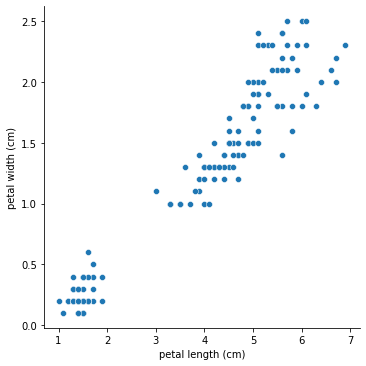

In [ ]:
import seaborn as sns
%matplotlib inline

# plot the petal width v.s. the petal length
sns.relplot(data = iris_table,
            x = iris_table.columns[2], y = iris_table.columns[3])

<br>

Fit a linear regression model to the data.

In [ ]:
from sklearn import linear_model

# create a linear regression object
regres_iris = linear_model.LinearRegression()

# create new arrays for the predictive and response variables
pet_wid = iris_dataset['data'][:, np.newaxis, 3]
pet_len = iris_dataset['data'][:, np.newaxis, 2]

# fit linear regression model to the data
regres_iris.fit(pet_len, pet_wid)

# extract slope 
m = float(regres_iris.coef_)

# extract intercept
n = float(regres_iris.intercept_)

print('slope = {} and intercept = {}'.format(m, n))

slope = 0.41575541635241153 and intercept = -0.3630755213190291


<br>
Plot fitted line

Text(0, 0.5, 'petal width (cm)')

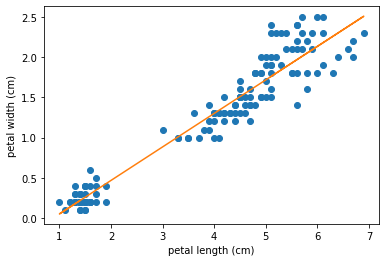

In [ ]:
import matplotlib.pyplot as plt
plt.plot(iris_dataset['data'][:,2], iris_dataset['data'][:,3], 'o')
plt.plot(iris_dataset['data'][:,2], m*iris_dataset['data'][:,2] + n)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

<br>

The linear model follows the equation shown above:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $ \beta_1 $ = 0.42
* $ \beta_0 $ = -0.36

<br>

$$ \hat y = 0.42 -0.36 x $$

<br>

How are $ \beta_0 $ and $ \beta_1 $ estimated? In other words how is the line which fits the data best found?

In regression algorithms the aim is to find the model which minimises the loss function. Choosing the apropriate loss function is key in machine learning. In the case of simple linear regression the aim is to find the line which minimises the difference between the predicted values and the true values. 

Let's look at it in this image: 

<br>

![image.png](https://littleml.files.wordpress.com/2019/03/residuals-1.png)

<br>

The difference between the predicted value and the true value is called residual (doted lines). To account for the fact that predictions can be higher and lower than the true value (this is residuals can be positive or negative), a linear model aims to minimise the Residual Sum of Squares (RSS):

<br>

$$ RSS(\beta) = \sum_{i=1}^{N} (\hat y - y)^2 $$

<br>

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>


For linear regression models, there is a closed-formed solution to compute the best coefficient values using the [Normal equation](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

If our model is unbiased we would expect the residuals to distribute randomly as seen in the plot below:





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


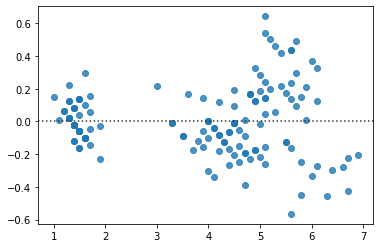

In [ ]:
# create a residuals plot
sns.residplot(iris_dataset['data'][:,2],iris_dataset['data'][:,3])

## Evaluate the model

There are different metrics to evaluate the performance of linear regression models.

### Mean Absolute Error (MAE)

The **Mean absolute error** is perhaps the simplest metric. It computes the average absolute difference between predictions and actual values. It therefore follows the formula:

$$ MAE(\beta) = {\frac{1}{N}}\sum_{i=1}^{N} |\hat y - y| $$ 

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value


<br>


In the case of MAE all residuals are weighted equally. For this reason it is not optimal when outliers are present.

The interpretation of this metric relatively straight forward. It indicates the average error of the model (regardless of direction). For example, if a linear regression model which predicts the height (cm) based on the weight (kg) has MAE = 3, it indicates that the model predictions have an average of error ±3 cm.



<br>

### Root Mean Square Error (RMSE)

The **Root mean square error**  is another common metric to evaluate the performance of machine learning algorithms. It follows the formula:

<br>

$$ RMSE(\beta) =  \sqrt {\frac{1}{N}\sum_{i=1}^{N}(\hat y - y)^2} $$


* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>

Since the differences between predicted and true values are squared, the importance of errors increases quadratically on their value. This means that predictions which are very far from the true values are penalised by RMSE. 

### Coeficient of determination ($ R^2$)

There are other metrics which evaluate how good the model fits data. The coefficient of determination or R-squared ($R^2$) is one example. It measures the proportion of total variance of the response variable explained by model. The higher the value the better the model fits the data. It follows the equation:

<br>

$$ R^2 = 1 - \frac {SS_{res}}{SS_{tot}} = 1 - \frac {\sum_{i=1}^{N} (\hat y - y)^2}{\sum_{i=1}^{N}(y - \bar y)^2} $$

* $ \hat y $ =  predicted value
* $ y $ = true value
* $ \bar y $ = mean of response variable
* $ N $ = number of data points

<br>

## Build linear model

Let's now fit a simple linear model to the iris dataset and make predictions. In this case we are interested in predicting the petal width (response variable) using the petal length as predictor variable.


The process has the following steps:

1. Split dataset into training and test set
2. Fit linear model to the training data
3. Apply the model to test set.
4. Evaluate the model performance (MAE, RMSE and $R^2$)

In [ ]:
# split dataset into training and test set

# set a random seed so that the randomly sampled rows are always the same
import random
random.seed(20)

# sample 20 row numbers to use as test set
rows_test = random.sample(range(0,pet_len.shape[0]),20)

# get the remaining row numbers as training set
rows_train = np.setxor1d(rows_test, list(range(0, pet_len.shape[0])))

# split predictor variable into test and training set
pet_len_train = np.delete(pet_len, rows_test)[:,np.newaxis]
pet_len_test = np.delete(pet_len, rows_train)[:,np.newaxis]

# split response variable into test and training set
pet_wid_train = np.delete(pet_wid, rows_test)[:, np.newaxis]
pet_wid_test = np.delete(pet_wid, rows_train)[:,np.newaxis]

print("Training set has {} observations and test set has {}".format(pet_len_train.shape[0], pet_len_test.shape[0]))



Training set has 130 observations and test set has 20


Text(0, 0.5, 'petal width (cm)')

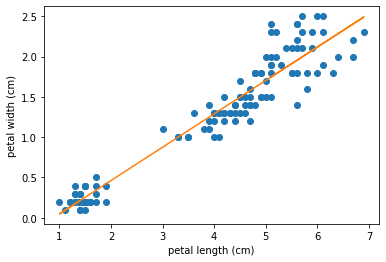

In [ ]:
# fit a line to the training set

# create a linear regression object
regres_pet = linear_model.LinearRegression()

# fit a linear model to the training data
regres_pet.fit(pet_len_train, pet_wid_train)

# plot the length v.s. width the the fitted line
plt.plot(pet_len_train , pet_wid_train, 'o')
plt.plot(pet_len_train, regres_pet.predict(pet_len_train))
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [ ]:
# make predictions on the test set
pet_wid_pred = regres_pet.predict(pet_len_test)

# create data frame with predicted and true values
pred_table_wid = pd.DataFrame.from_dict({'Predicted_width': pet_wid_pred.flatten(), 'True_width': pet_wid_test.flatten()})

# print data frame 
pred_table_wid

,Predicted_width,True_width
0,0.213548,0.3
1,0.254940,0.3
2,0.296332,0.2
3,0.296332,0.4
4,0.254940,0.1
5,0.172156,0.2
6,0.296332,0.6
7,1.496697,1.5
8,1.289738,1.3
9,1.496697,1.5


Text(0, 0.5, 'Predicted width')

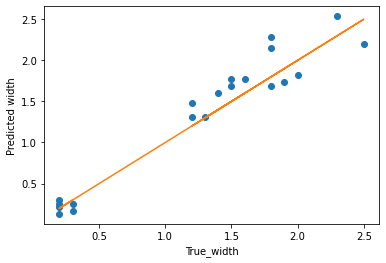

In [ ]:
# Make scatter plot of predicted vs true sepal width
plt.plot(pet_wid_test, pet_wid_pred, 'o')
plt.plot(pet_wid_test, pet_wid_test)
plt.xlabel('True_width')
plt.ylabel('Predicted width')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


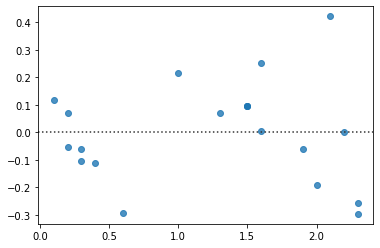

In [ ]:
# make residuals plot
sns.residplot(pet_wid_test, pet_wid_pred)

In [ ]:
# evaluate the performance of the model

# import metrics package
from sklearn import metrics

# compute MAE
petal_mae = metrics.mean_absolute_error(pet_wid_pred, pet_wid_test)

# get RMSE
petal_rmse = metrics.mean_squared_error(pet_wid_pred, pet_wid_test,
                           squared = False)

print("The model has a MAE = {} and a RMSE = {}".format(petal_mae, petal_rmse))


The model has a MAE = 0.17479908325052987 and a RMSE = 0.21116253172465146


In [ ]:
# get squared R 
metrics.r2_score(pet_wid_pred, pet_wid_test)

0.9277753591881827

## Exercise 

Let's now do an exercise. The iris dataset contains two additional variables sepal length and sepal width. How well can we predict the length of sepals using the length of petals? 

1. Fit a linear model to predict sepal length uisng the petal length 
2. Predict the sepal length of a test set using the model
3. Compute the MAE, RMSE and $R^2$.


In [ ]:
# the column we are interested now are 0 and 2
iris_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


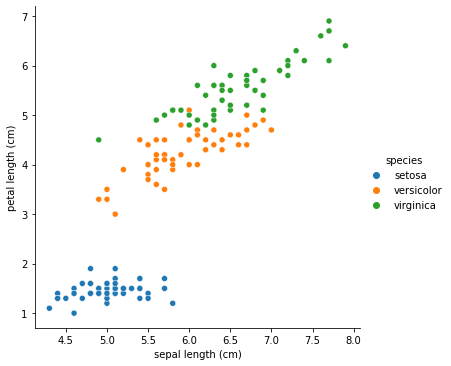

In [ ]:
# the relationship seems different for the setosa species
sns.relplot(data = iris_table, x = iris_table.columns[0], y = iris_table.columns[2], hue="species")

In [ ]:
# exclude setosa species for the downstream analysis

# get sepal length for versicolor and virginica species
sep_len = iris_table[iris_table.species != "setosa"].iloc[:, 0][:, np.newaxis]

# get petal length for versicolor and virginica species
pet_len_filt = iris_table[iris_table.species != "setosa"].iloc[:,2][:, np.newaxis]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


### Solution

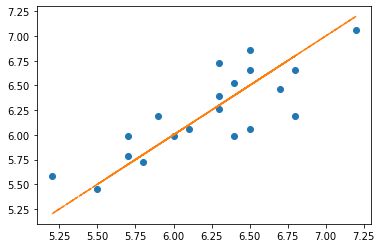

In [ ]:
random.seed(10)

# sample 5 row numbers to use as test set
rows_test = random.sample(range(0, sep_len.shape[0]),20)

# get the remaining row numbers as training set
rows_train = np.setxor1d(rows_test, list(range(0, sep_len.shape[0])))

# split predictor variable into test and training set
sep_len_train = np.delete(sep_len, rows_test)[:,np.newaxis]
sep_len_test = np.delete(sep_len, rows_train)[:,np.newaxis]

# split response variable into test and training set 
pet_len_train = np.delete(pet_len_filt, rows_test)[:, np.newaxis]
pet_len_test = np.delete(pet_len_filt, rows_train)[:, np.newaxis]

# create a linear regression object
regres_sep = linear_model.LinearRegression()

# fit a linear model to the training data
regres_sep.fit(pet_len_train, sep_len_train)

# predict values of test set
sep_len_pred = regres_sep.predict(pet_len_test)

# plot predicted values v.s. true values
plt.plot(sep_len_test, sep_len_pred, 'o')
plt.plot(sep_len_test, sep_len_test, "-.")



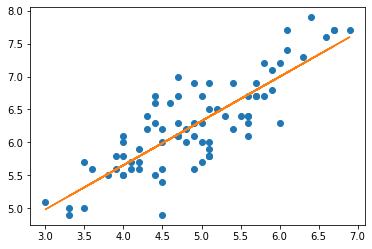

In [ ]:
# plot fitted line to train data
plt.plot(pet_len_train, sep_len_train, 'o')
plt.plot(pet_len_train, regres_sep.predict(pet_len_train))

In [ ]:
# get MAE 
metrics.mean_absolute_error(sep_len_test, sep_len_pred)

0.2212355038642344

In [ ]:
# get RMSE 
metrics.mean_squared_error(sep_len_test, sep_len_pred, squared = False)

0.2769630990972822

In [ ]:
# get squared R
metrics.r2_score(sep_len_test, sep_len_pred)

0.6680720109841154

## Multiple linear regression

In many cases we have more than one predictor variable describing the response variable. The same linear regression model can be applied in such cases. In that case there is one additional parameter per additional predictor variable. With these multidimensional data instead of finding the line which best fits the data, the plane (2 predictor variables) or hyperplane (more than 2 predictor variables) is sought.

<br>

$$ \hat y = \beta_0 + \beta_1x_{1} + \beta_2x_{2} ... \beta_nx_{n} $$ 

<br>

* $\hat y $ = predicted value 
* $ \beta_i $ = parameters or coefficients of the model
* $ x_{i} $ = predictor variable  

<br> 

Let's fit a multiple linear regression model to the diabetes dataset. The response variable in this case is termed disase progression.


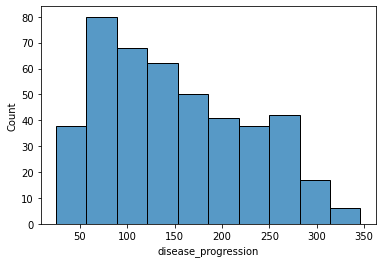

In [ ]:
# make histogram of disease progression values
sns.histplot(data = diabetes_table, x = 'disease_progression')

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into test and training set
# scikit learn includes a function to do so
# we use 80% of the data for training and 20 % as test set
diab_train, diab_test, progr_train, progr_test = train_test_split(diabetes_dataset['data'], diabetes_dataset['target'],
                                                                  test_size = 0.2, random_state = 42)

# create a linear regression object
diab_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
diab_lin_model = diab_lin_model.fit(diab_train, progr_train)

# predict values of test set
diab_pred = diab_lin_model.predict(diab_test)

# make data frame with predicted and true values
pred_table_diab = pd.DataFrame.from_dict({'Predicted_progression': diab_pred.flatten(), 'True_progression': progr_test.flatten()})

# print data frame 
pred_table_diab



,Predicted_progression,True_progression
0,139.548313,219.0
1,179.520306,70.0
2,134.041333,202.0
3,291.411936,230.0
4,123.787237,111.0
...,...,...
84,115.009746,153.0
85,78.958867,98.0
86,81.557314,37.0
87,54.377478,63.0


Text(0, 0.5, 'Predicted progression(a.u.)')

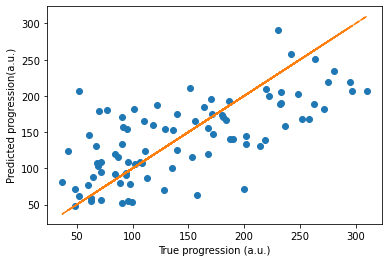

In [ ]:
# plot predicted values vs real values
plt.plot(progr_test, diab_pred, 'o')
plt.plot(progr_test, progr_test, "--")
plt.xlabel("True progression (a.u.)")
plt.ylabel("Predicted progression(a.u.)")

In [ ]:
# get MAE
diab_mae = metrics.mean_absolute_error(progr_test, diab_pred)

print('The MAE of the model is {}'.format(diab_mae))

The MAE of the model is 42.79389304196525


In [ ]:
# get RMSE
diab_rmse = metrics.mean_squared_error(progr_test, diab_pred,
                                       squared = False)

print('The RMSE of the model is {}'.format(diab_rmse))

The RMSE of the model is 53.8532569849144


In [ ]:
# get squared R 
diab_rsqr = metrics.r2_score(progr_test, diab_pred)

print('The R^2 of the model is {}'.format(diab_rsqr))

The R^2 of the model is 0.452606602161738


## Polynomial regression

There are occasions in which the relationship between the dependent and independent variables is not linear. In such cases a linear regression model would not fit the data well. 

Let's see an example:

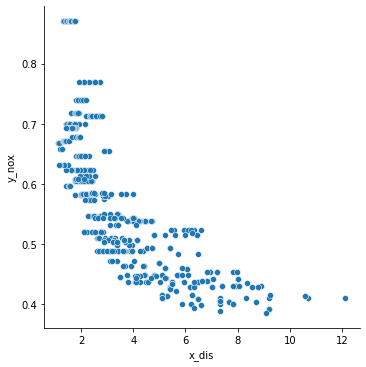

In [ ]:
# load boston dataset
boston_dataset = datasets.load_boston()

# get dependent and independent variables as arrays
y_nox = boston_dataset['data'][:, np.newaxis ,4]
x_dis = boston_dataset['data'][:, np.newaxis ,7]

# make dataframe with dependent and independent variable
boston_table = pd.DataFrame.from_dict({'y_nox': y_nox.flatten(),
                                       'x_dis': x_dis.flatten()})

# make scatter plot
sns.relplot(data = boston_table, x = boston_table.columns[1], y = boston_table.columns[0])

In [ ]:
bost_lin_model = linear_model.LinearRegression().fit(x_dis, y_nox)

# compute squared R
rsqr_bos_lin = metrics.r2_score(y_nox, bost_lin_model.predict(x_dis))

print('The R^2 of the model is {}'.format(rsqr_bos_lin))

The R^2 of the model is 0.5917149670934201


In [ ]:
# get RMSE
rmse_bos_lin = metrics.mean_squared_error(y_nox, bost_lin_model.predict(x_dis),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_lin))

The RMSE of the model is 0.07396937272094305


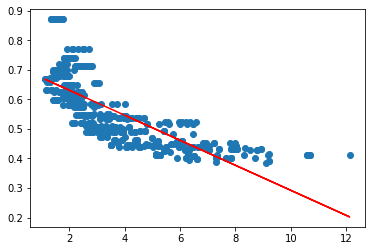

In [ ]:
# make scatter plot with fitted line
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_lin_model.predict(x_dis), 'r')



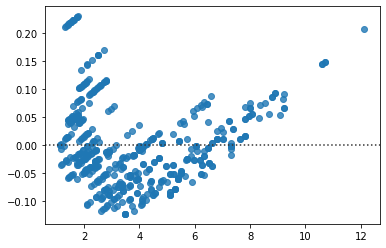

In [ ]:
# make residuals plot
sns.residplot(x = x_dis.flatten(), y = y_nox.flatten())

The following steps are done when carrying out polynomial regression:

1. Generate polynomial features from original features.
2. Fit a linear regression model to the extended feature set.
3. Evalute the fit of the model

<br>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# generate new features (second degree polynomial)
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_dis_poly = poly_features.fit_transform(x_dis)

x_dis_poly[0]


array([ 4.09  , 16.7281])

In [ ]:
# fit linear model to extended data
bost_poly_model = linear_model.LinearRegression().fit(x_dis_poly, y_nox)

# compute squared R
rsqr_bos_poly = metrics.r2_score(y_nox, bost_poly_model.predict(x_dis_poly))

print('The R^2 of the model is {}'.format(rsqr_bos_poly))

The R^2 of the model is 0.6998562064647851


In [ ]:
# get RMSE
rmse_bos_poly = metrics.mean_squared_error(y_nox, bost_poly_model.predict(x_dis_poly),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_poly))

The RMSE of the model is 0.06342126345299987


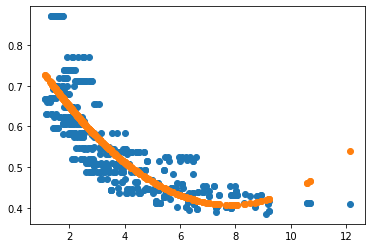

In [ ]:
# make scatter plot with predicted and real values
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_poly_model.predict(x_dis_poly), 'o')

In [ ]:
# get coefficients from the model 
bost_poly_model.coef_

array([[-0.1116276 ,  0.00713503]])

Since we used a polynomial of degree 2, out model follows the equation:

<br>

$$ \hat y = \beta_0 + \beta_1x_1 + \beta_2x_1^2  $$


## Final exercise
To end this section let's explore the relationship between methylation and age. In the dataset below we can find the methylation levels for 53 CpGs from 100 individuals as well as the corresponding age. The dataset was obtained from [Daunay et al., 2019](https://www.nature.com/articles/s41598-019-45197-w#Sec14). Methylation levels were measured from blood samples using pyrosequencing. 

Can we predict the age of the individuals based on the methylation levels using linear regression? How accurate are our predictions? 

In [ ]:
# load dataset 
age_table = pd.read_csv("methylation_data.csv")


In [ ]:
# transform it into an array
meth_array = age_table.to_numpy()


### Solution

In [ ]:
# split dataset into test and training set
meth_train, meth_test, age_train, age_test = train_test_split(meth_array[:,1:99], meth_array[:, 0],
                                                              test_size = 0.2, random_state = 42)

# create a linear regression object
age_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
age_lin_model = age_lin_model.fit(meth_train, age_train)

# predict values of test set
age_pred = age_lin_model.predict(meth_test)

# make data frame with predicted and true values
pred_table_age = pd.DataFrame.from_dict({'Predicted_age': age_pred.flatten(), 'Chronological_age': age_test.flatten()})

# print data frame 
pred_table_age

,Predicted_age,Chronological_age
0,26.915782,25.0
1,60.171115,58.0
2,32.576195,45.0
3,51.050426,49.0
4,60.883792,48.0
5,50.781928,39.0
6,68.048044,59.0
7,20.685636,21.0
8,35.731515,36.0
9,11.605644,19.0


Text(0, 0.5, 'Predicted age (years)')

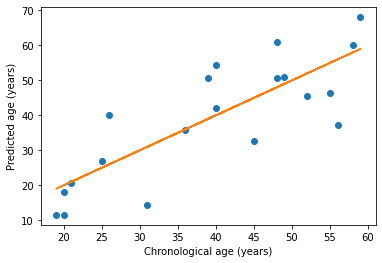

In [ ]:
# plot predicted age v.s. chronological age 
plt.plot(age_test ,age_pred, 'o')
plt.plot(age_test, age_test)
plt.xlabel("Chronological age (years)")
plt.ylabel("Predicted age (years)")

In [ ]:
# compute MAE 
age_mae = metrics.mean_absolute_error(age_test, age_pred)

# compute RMSE 
age_rmse = metrics.mean_absolute_error(age_test, age_pred)

# compute squared R
age_sqrtr = metrics.r2_score(age_test, age_pred)

In [ ]:
print("The model predicts age with accuracy ±{} years".format(round(age_mae, 2)))

The model predicts age with accuracy ±7.72 years


# Classification


## Decission Tree

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

schematic           |  example
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/700/1*SKFU4V4qWNDU8sXgq36ncw.png)|![image.png](https://d33wubrfki0l68.cloudfront.net/cb281b80c41c9e76eb327e26ed5e0e6e5f05fc7f/31de9/static/b42ef5448b11ec2f2ec20ca7f97cbb3c/9cda9/decision-tree-sports.png)

**Underlying principle of the algorithm**

It recursively splits the training set till it no longer
finds a split which reduces the impurity

first split|count missclassification
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/501/0*UvBgln5Di3yeLZHI.png)|![image.png](https://miro.medium.com/max/500/0*NFb_YzdigP99hgjC.png)

Find the missclassification for every split on X1|This is the best split
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/514/0*NLvKQda-yuqa4Wee.png)|![image.png](https://miro.medium.com/max/491/0*2Hu0AMYGLXqgEMhV.png)

Find the next split | Finished
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/510/0*zV-l2CROY1ZP_3qA.png)|![image.png](https://miro.medium.com/max/497/0*uGZjGt6N7BRxb46Q.png)

Resulting tree
![image.png](https://miro.medium.com/max/504/0*Z66SWGnP7OqSLuyC.png)


source:
https://towardsdatascience.com/learn-how-decision-trees-are-grown-22bc3d22fb51


Above our cost function we minimized was the number of missclassification
Two other common ones are gini impurity and information gain (entropy)

![image.png](https://miro.medium.com/max/1204/0*Nsuwaq2Padpbdz9Y.png)

It is out of the scope of this course to explain the math behind it
but a takehome message key difference between gini and entropy would be:

Gini: the feature with a lower Gini index is chosen for a split
Entropy: The feature with the largest information gain should is used as the root node

Further read:
https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4
https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

##### Load Libraries

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##### Exploring the iris dataset

In [88]:
iris=load_iris()

The iris dataset contains the following data

* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width

![link text](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

In [89]:
print ("iris.data");print()
print("type");print(type(iris.data)); print()
print("shape");print(iris.data.shape);print()
print("first 5 rows of the iris dataset:");print()
iris.data[:5]

iris.data

type
<class 'numpy.ndarray'>

shape
(150, 4)

first 5 rows of the iris dataset:



array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Machine learning terminology

*  row=an observation (also known as: sample,record)
*  column= feature (also known as: predictor, attribute, independent variable)


In [90]:
print("features:"); print (iris.feature_names);print()

print("iris.target")
print("integers representing the species of each observation");print()
print("shape");print(iris.target.shape);print()
print(iris.target); print()

print("iris.target_names")
print("encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica")
print(iris.target_names)

features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

iris.target
integers representing the species of each observation

shape
(150,)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

iris.target_names
encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
['setosa' 'versicolor' 'virginica']


In [91]:
full_df = pd.DataFrame(iris.data, columns=iris.feature_names)
full_df["species"] = iris.target

code2species={0:"setosa",1:"versicolor",2:"virginica"}
full_df["species_name"] = full_df["species"].map(code2species)
full_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


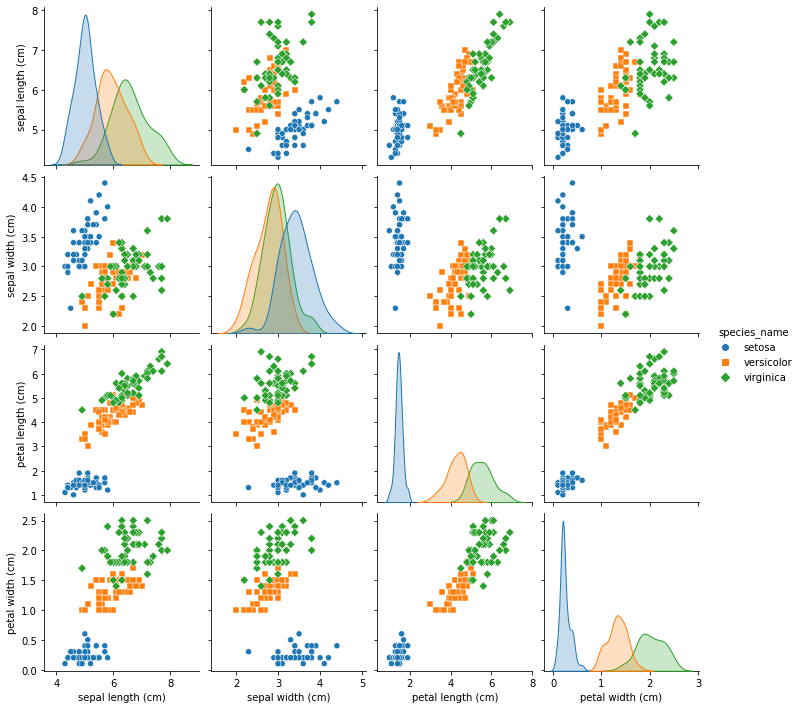

In [92]:
sns.pairplot(
    full_df.drop(["species"],axis=1), 
    hue='species_name',markers=["o", "s", "D"])
plt.show()

You see that iris-setosa (dot) is easily identifiable by petal length and petal width, while the other two species are much more difficult to distinguish

#### **Preprocess Data**

So above would now be a really nice "tidy" format which we could use for in depth explanatory analysis. However, since we want to use Machine Learning (i.e. scikit learn) we have to make sure that we fullfill all requirements:

Features and target: 
1. are separate objects
2. should be numeric
3. should be NumPy arrays
4. should have compatible shapes

Luckily in this dataset all the requirements are already fullfilled
So we only need to split the data in training and test set

In [365]:
# Split dataset into training 80% and test (20%) set
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=test_size)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:120
observations in the test set:30


#### Create Decission Tree classifier

In [366]:
dct_clf = DecisionTreeClassifier(random_state=123456)
dct_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

Tada! We have done it! We have officially trained our decission tree classifier! Now let’s play with it

#### Apply Classifier to Test Data

In [367]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
targets_predicted=dct_clf.predict(x_test)
targets_predicted

array([0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 2])

What are you looking at above? Remember that we coded each of the three species of plant as 0, 1, or 2. What the list of numbers above is showing you is what species our model predicts each plant is based on the the sepal length, sepal width, petal length, and petal width. 

How confident is the classifier about each plant? We can see that too.



In [368]:
# View the predicted probabilities of the first 5 observations
dct_clf.predict_proba(x_test)[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

There are three species of plant, thus [ 1. , 0. , 0. ] tells us that the classifier is certain that the plant is the first class.

If you would have for example a row with [ 0., 0.9, 0.1. ]the classifier gives a 90% probability the plant belongs to the 2nd class and a 10% probability the plant belongs to the 3rd class. Because 90 is greater than 10, the classifier would predict the plant is the 2nd class.


In [369]:
def appply_clf(clf,dataset,x_test,y_test):

  df=pd.DataFrame(x_test, columns=dataset.feature_names)
  df["target"]=y_test
  df["target_predicted"]=clf.predict(x_test)
  return df

test_df=appply_clf(dct_clf,iris,x_test,y_test)
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_predicted
0,5.2,3.5,1.5,0.2,0,0
1,6.8,3.2,5.9,2.3,2,2
2,5.4,3.4,1.7,0.2,0,0
3,6.0,2.2,4.0,1.0,1,1
4,6.7,2.5,5.8,1.8,2,2


That looks pretty good! At least for the first five observations.
So lets do a quick evaluation


In [370]:
print(f'accuracy:{accuracy_score(y_test, dct_clf.predict(x_test))}')

accuracy:0.9333333333333333


Before we evaluate the classifier further lets explore and try to understand the used classifier

#### Explore the classifier

View Feature Importance

This is in my opinion the most powerful parts of tree based classification models. The importance of each feature can not only help you to understand better how the algorithm comes to its decision but also might give you insights into the underlying biology

No handles with labels found to put in legend.


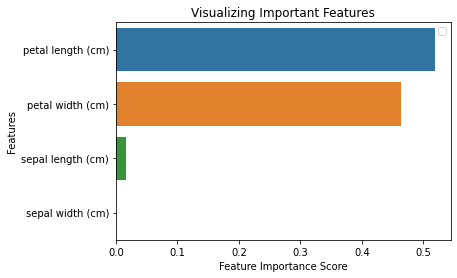

In [371]:
def get_feature_importance(clf,dataset):
  feature_imp = pd.Series(
      clf.feature_importances_,index=dataset.feature_names
      ).sort_values(ascending=False)

  sns.barplot(x=feature_imp, y=feature_imp.index)
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title("Visualizing Important Features")
  plt.legend()
  plt.show()

get_feature_importance(dct_clf,iris)

As you can see the library has identified that petal length & width are the most important features in terms of making the split.

Lets start with plotting the tree

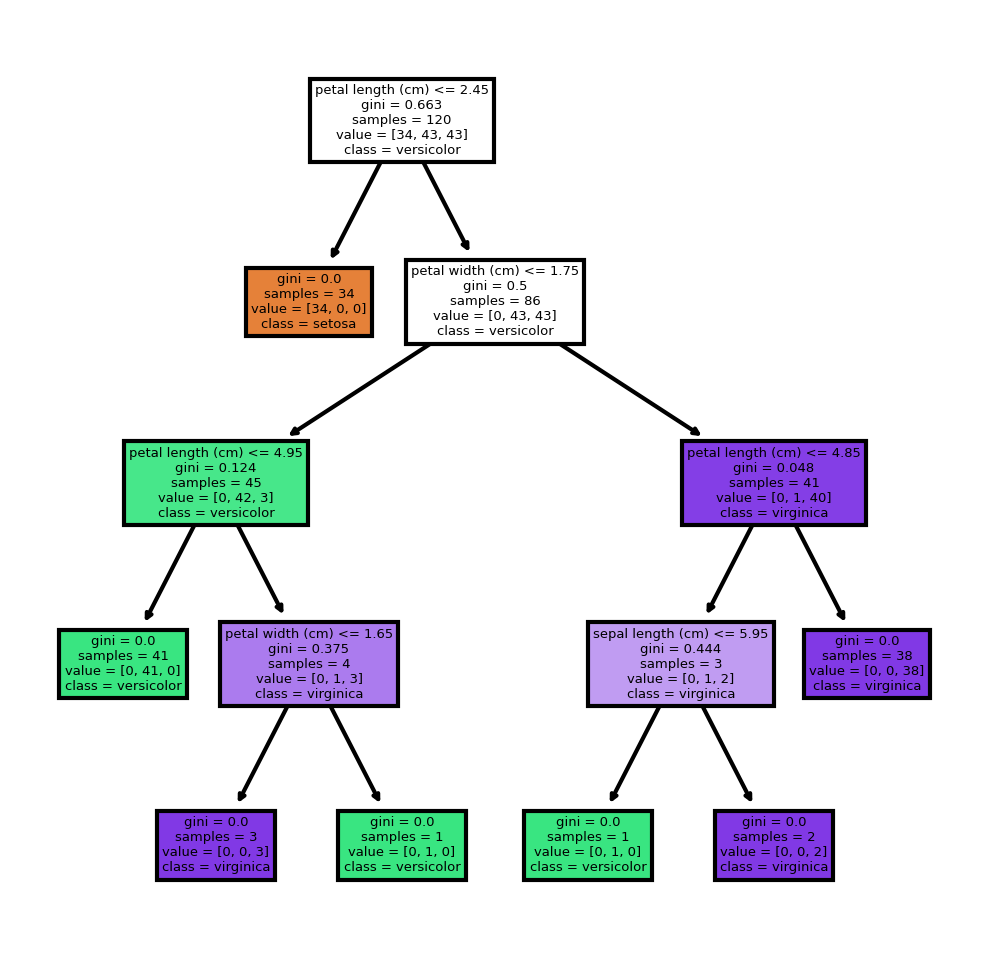

In [372]:
plt.figure(figsize=(4,4), dpi=300)
plot_tree(dct_clf, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.show()

In this visualization, each color signifies a iris species. The shade of the color is indicative of the purity

#### Improve our classifier

That is a quite "complex" tree lets see if we can simplify it?

`DecisionTreeClassifier` has a lot of configuration options.

|Option |Description|
--- | --- 
|max_depth|How many split will my tree be allowed to do?|
|criterion|loss function to train my tree (entropy/gini)|
|max_features|The number of features to consider when looking for the best split|
|max_leaf_nodes|Limit of how many leaves each split can produce|
|min_samples_leaf|The minimum number of samples required to produce a leaf|
|min_samples_split|Number of samples required in the leaf before splitting|

So it would be quite tedious to test them all on your own:
--> Meet GridSearch

In [373]:
dct_clf2 = DecisionTreeClassifier(random_state=123456)
params = {
    "max_depth"         : [1,2,3,4,5,10],
    "criterion"         : ['entropy', 'gini'],
    "max_features"      : [0.5, 1],
    "max_leaf_nodes"    : [2,3,5],
    'min_samples_leaf'  : [2,3,5],
    'min_samples_split' : [2,3,5]
}
gs = GridSearchCV(dct_clf2, params, cv=3)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()
dct_clf2=gs.best_estimator_
dct_clf2.fit(x_train,y_train)
dct_clf2

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=0.5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

So lets see how our tree has changed

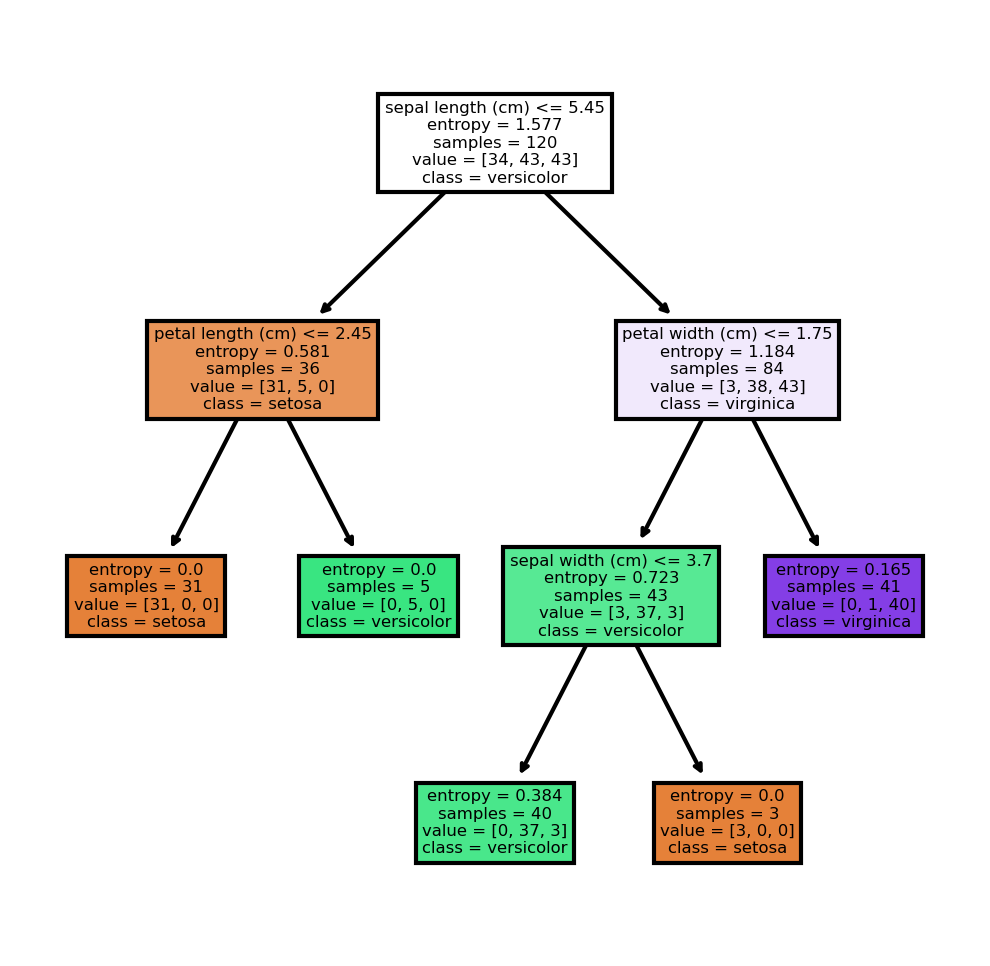

In [374]:
plt.figure(figsize=(4,4), dpi=300)
plot_tree(dct_clf2, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.show()

Indeed much simpler as our old tree but before we see how this impacts our performance. So again a quick evaluation

In [375]:
print("accurcacy:")
for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  print(f'{t[0]}:{accuracy_score(y_test, t[1].predict(x_test))}')

accurcacy:
dct_clf:0.9333333333333333
dct_clf2:0.9


Indeed a similar performance eventhough having a much simpler tree.
So lets evaluate it in depth

#### Evaluate our classifiers

In [376]:
def get_clf_performance(name,clf,x_train,y_train,x_test,y_test):
  print(name)
  print("classification report")
  y_test_pred = clf.predict(x_test)
  print(classification_report(y_test, y_test_pred))

for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

dct_clf
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      0.86      0.86         7
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30

dct_clf2
classification report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.70      1.00      0.82         7
           2       1.00      0.71      0.83         7

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.93      0.90      0.90        30



If you compare this to our classfier in the beginning they perform similar but we managed to greatly simplify it 

However, this doesn’t really tell us anything about where we’re doing well. A useful technique for visualising performance is the confusion matrix.

This is simply a matrix whose diagonal values are true positive counts, while off-diagonal values are false positive and false negative counts for each class against the other.

OK sorry that might have confused you (pun intended ;P)

Hopefully that is more easy

anything on the diagonal was classified correctly and anything off the diagonal was classified incorrectly.


dct_clf


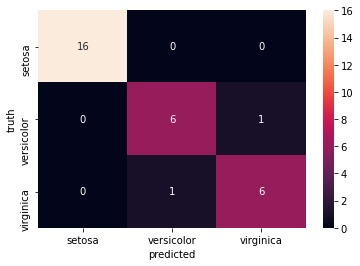

dct_clf2


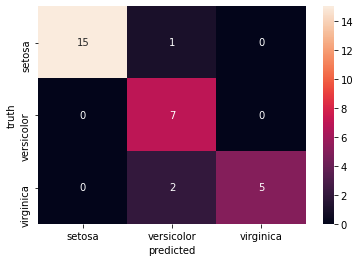

In [381]:
def get_clf_cm(name,clf,target_names,x_train,y_train,x_test,y_test):
  
  print(name)
  cm = pd.DataFrame(
        confusion_matrix(y_test, clf.predict(x_test)),
        columns=target_names, 
        index=target_names
        )
  sns.heatmap(cm, annot=True)
  plt.xlabel("predicted")
  plt.ylabel("truth")
  plt.show()

for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  get_clf_cm(t[0],t[1],iris.target_names,x_train,y_train,x_test,y_test)

The initial (but more complex) and the simplified decission tree performed exactly the same in terms of miss classifications

#### Excercise

Apply everything you have learned on the wine dataset.
Feel free to use my mini functions to save some line of codes.
Do not stress about any time limit I just want you to get familiar
with the scikit-learn commands there is no need to finish it.
Just try to get as far as possible ;D

In [383]:
from sklearn.datasets import load_wine

##### Solution

In [384]:
from sklearn.datasets import load_wine
wine = load_wine()

In [385]:
x_train, x_test, y_train, y_test = train_test_split(wine.data,wine.target)

wine_clf = DecisionTreeClassifier(random_state=123456)
wine_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

In [386]:
get_clf_performance("wine_clf",wine_clf,x_train,y_train,x_test,y_test)

wine_clf
classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.81      0.89      0.85        19
           2       0.92      0.73      0.81        15

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.87      0.87      0.86        45



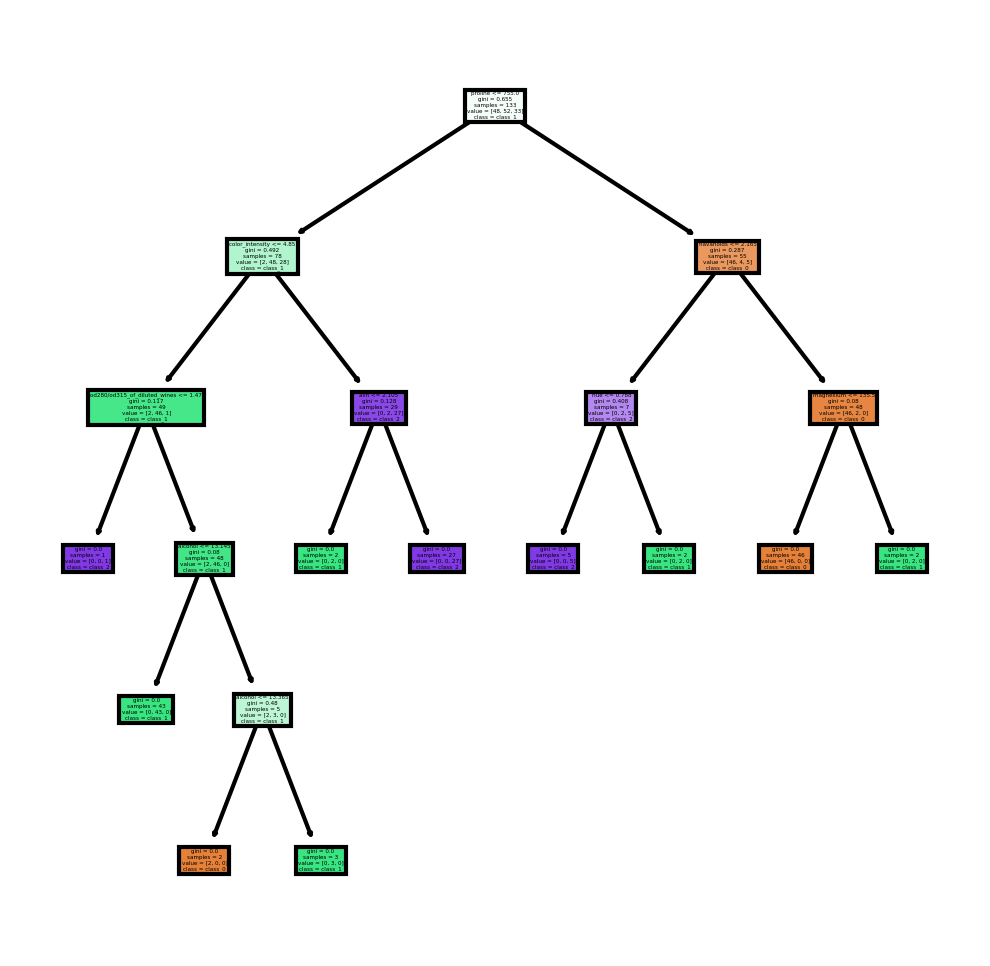

In [387]:
plt.figure(figsize=(4,4), dpi=300)
plot_tree(wine_clf,feature_names=wine.feature_names,
          class_names=wine.target_names, filled=True)
plt.show()

In [388]:
test_df=appply_clf(wine_clf,wine,x_test,y_test)
test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_predicted
0,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1,1
1,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2,2
2,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1,1
3,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1,2
4,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0,1,1


No handles with labels found to put in legend.


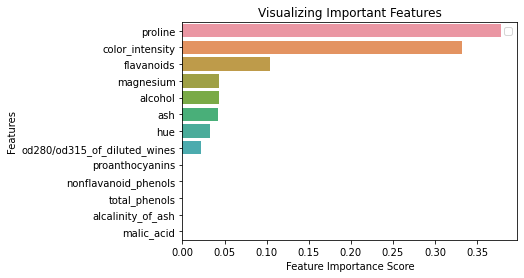

In [389]:
get_feature_importance(wine_clf,wine)

In [390]:
wine_clf2 = DecisionTreeClassifier(random_state=123456)
params = {
    "max_depth"         : [1,2,3,4,5,10],
    "criterion"         : ['entropy', 'gini'],
    "max_features"      : [0.5, 1],
    "max_leaf_nodes"    : [2,3,5],
    'min_samples_leaf'  : [2,3,5],
    'min_samples_split' : [2,3,5]
}
gs = GridSearchCV(wine_clf2, params, cv=3)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()
wine_clf2=gs.best_estimator_
wine_clf2.fit(x_train,y_train)
wine_clf2

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=0.5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

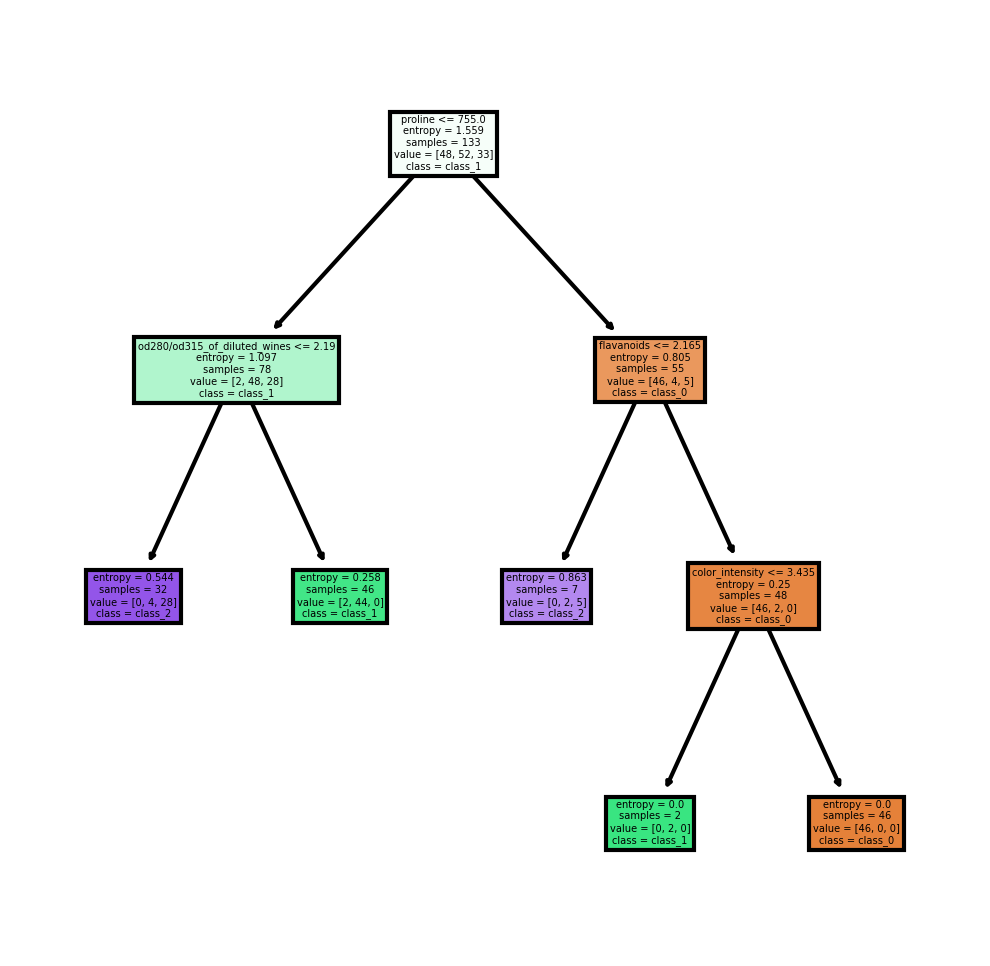

In [391]:
plt.figure(figsize=(4,4), dpi=300)
plot_tree(wine_clf2, feature_names=wine.feature_names, 
          class_names=wine.target_names, filled=True)
plt.show()

In [392]:
for t in [("wine_clf",wine_clf),("wine_clf2",wine_clf2)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

wine_clf
classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.81      0.89      0.85        19
           2       0.92      0.73      0.81        15

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.87      0.87      0.86        45

wine_clf2
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.79      0.86        19
           2       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.91      0.91      0.90        45
weighted avg       0.90      0.89      0.89        45



wine_clf


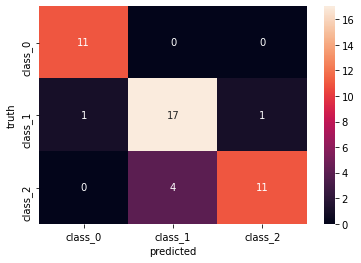

wine_clf2


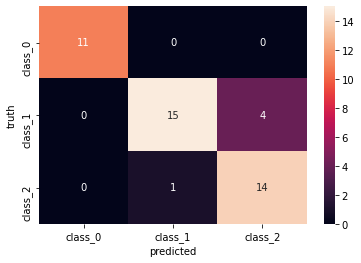

In [393]:
for t in [("wine_clf",wine_clf),("wine_clf2",wine_clf2)]:
  get_clf_cm(t[0],t[1],wine.target_names,x_train,y_train,x_test,y_test)

## Random Forest

Random Forest combines the results of many different decision trees to make the best possible decisions.

![image.png](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)


#### Load Libraries

In [394]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

To compare it to our decision tree classifier we take again the iris dataset

In [395]:
iris = load_iris()

#### Preprocess Data

In [396]:
# Split dataset into training 80% and test (20%) set
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=test_size)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:120
observations in the test set:30


#### Create random forest classifier

In [397]:
num_of_random_trees=100
rf_clf = RandomForestClassifier(
    n_estimators=num_of_random_trees,
    oob_score=True, random_state=123456)

# Train the Classifier
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

#### **Apply Classifier To Test Data**


In [398]:
# View the predicted probabilities of the first 5 observations
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(t[0]);print(t[1].predict_proba(x_test)[0:5]);print()

dct_clf2
[[0.         0.925      0.075     ]
 [0.         0.02439024 0.97560976]
 [1.         0.         0.        ]
 [0.         0.02439024 0.97560976]
 [1.         0.         0.        ]]

rf_clf
[[0.   0.85 0.15]
 [0.   0.   1.  ]
 [0.97 0.03 0.  ]
 [0.   0.04 0.96]
 [1.   0.   0.  ]]



In [399]:
test_df=appply_clf(rf_clf,iris,x_test,y_test)
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_predicted
0,6.8,2.8,4.8,1.4,1,1
1,6.3,3.3,6.0,2.5,2,2
2,5.7,4.4,1.5,0.4,0,0
3,5.8,2.7,5.1,1.9,2,2
4,5.2,4.1,1.5,0.1,0,0


Again looks pretty good! At least for the first five observations.
Lets do a quick evaluation and comparison against the decission tree results

In [400]:
print("accuracy")
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

accuracy
dct_clf2: 0.9666666666666667
rf_clf: 1.0


The Random forest seems to perform slightly better but before we go in detail
we again want to explore our classifier

#### Explore the classifier

No handles with labels found to put in legend.


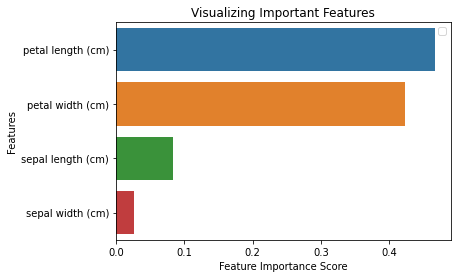

In [401]:
get_feature_importance(rf_clf,iris)

No surprise for the random forest also petal length and width are the most important features. So should we then even care about the sepal length/width?
Lets find it out!

#### Improve our classifier

Of course we could also search again for the best parameters but this
time I want to show you the power of feature selection

In [402]:
# Create a selector object that will use our classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rf_clf, threshold=0.15)

# Train the selector
sfm.fit(x_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(iris.feature_names[feature_list_index])

petal length (cm)
petal width (cm)


Create A Data Subset With Only The Most Important Features

In [403]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

Train A New Random Forest Classifier Using Only Most Important Features

In [404]:
# Create a new random forest classifier for the most important features
rf_clf2 = RandomForestClassifier(random_state=123456)

# Train the new classifier on the new dataset containing the most important features
rf_clf2.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123456,
                       verbose=0, warm_start=False)

In [405]:
print("accurcacy")
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

print(f'rf_clf2:{accuracy_score(y_test, rf_clf2.predict(x_important_test))}')

accurcacy
dct_clf2: 0.9666666666666667
rf_clf: 1.0
rf_clf2:1.0


As expected our original model which contained all four features performs
slightly better then our feature selected model. So for a small cost in accuracy we halved the number of features in the model

#### **Evaluate our classifiers**

In [406]:
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

get_clf_performance(
    "rf_clf2",rf_clf2,x_important_train,y_train,x_important_test,y_test)

dct_clf2
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

rf_clf
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

rf_clf2
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      

Performance stats look promising but better evaluate it in action!

dct_clf2


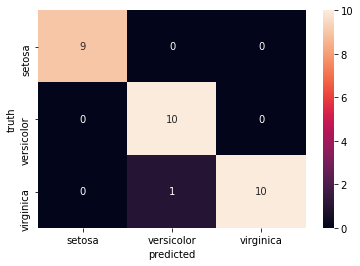

rf_clf


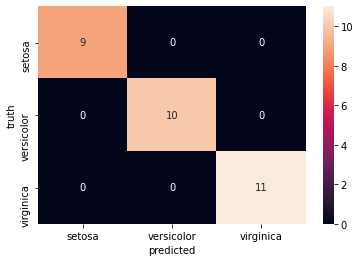

rf_clf2


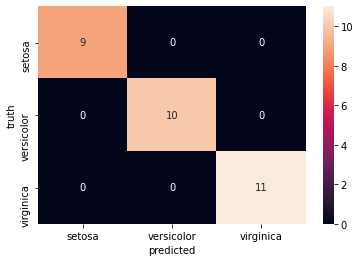

In [409]:
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  get_clf_cm(t[0],t[1],iris.target_names,x_train,y_train,x_test,y_test)

get_clf_cm(
    "rf_clf2",rf_clf2,iris.target_names,
    x_important_train,y_train,x_important_test,y_test)

So again only one missclassification so who knows maybe
we could improve it even further lets find out in the exercise

#### Exercise

In this exercise I just want you to play a litte with random forest classifier.
So try to find a better performing classifier.
But do not stress out I also have not found any ;D

For comparison please use random_state=123456

Hint:do not use too many trees (n_estimators)
otherwise it will run for ages :D

###### Solution

In [410]:
rf_clf3 = RandomForestClassifier(random_state=123456,n_estimators=100)
params = {
    "max_depth": [1,2,3,4,5,10],
    "criterion": ['entropy', 'gini'],
    "max_features": [0.5, 1],
    "max_leaf_nodes": [2,3,5],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [2,3,5]
}
gs = GridSearchCV(rf_clf3, params, cv=3)
gs.fit(x_important_train, y_train)
print(gs.best_params_)
print()
rf_clf3=gs.best_estimator_
rf_clf3.fit(x_important_train,y_train)
rf_clf3

KeyboardInterrupt: ignored

In [ ]:
for t in [("rf_clf2",rf_clf2),("rf_clf3",rf_clf3)]:
  get_clf_performance(
      t[0],t[1],x_important_train,y_train,x_important_test,y_test)

rf_clf3


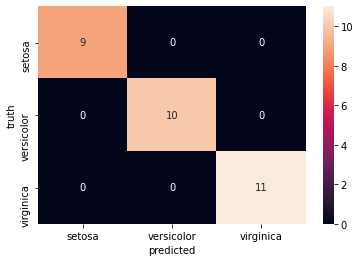

In [412]:
get_clf_cm("rf_clf3",rf_clf3,iris.target_names,
           x_important_train,y_train,x_important_test,y_test)

## Support Vector Machines

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and green, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or green.


# ![image.png](https://miro.medium.com/max/724/0*INqwwHXgTabQx7wM.png)

#### Load Libraries

In [413]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### generate a random dataset

In [421]:
def generate_random_list(seed):
    lst=[]
    for t in seed:
      start,end,ndigits=t
      lst.append(round(random.uniform(start,end),ndigits))
    return lst

def generate_random_dataset(size):
    # taken from
    #https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
    seed_x = [(0,2.5,1),(1,5,2),(3,5,2)]
    seed_y = [(0,20,1),(20,25,2),(5,25,2)]
    x,y,target = [],[],[]
    for i in range(size):
      x.extend(generate_random_list(seed_x))
      y.extend(generate_random_list(seed_y))
      target.extend([0,1,1])

    df = pd.DataFrame(list(zip(x,y,target)),columns=['x', 'y','target'])
    return df

# Generate dataset
dataset_size = 100
df = generate_random_dataset(dataset_size)
features = df[['x', 'y']].to_numpy()
label = df['target'].to_numpy()
target_names = np.unique(label)

print("generated dataset")
df.head()

generated dataset


,x,y,target
0,0.90,0.70,0
1,1.01,22.32,1
2,3.72,16.38,1
3,1.90,15.50,0
4,3.97,22.54,1


In [415]:
# Split dataset into training (80%) and testing (20%) set
x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:240
observations in the test set:60


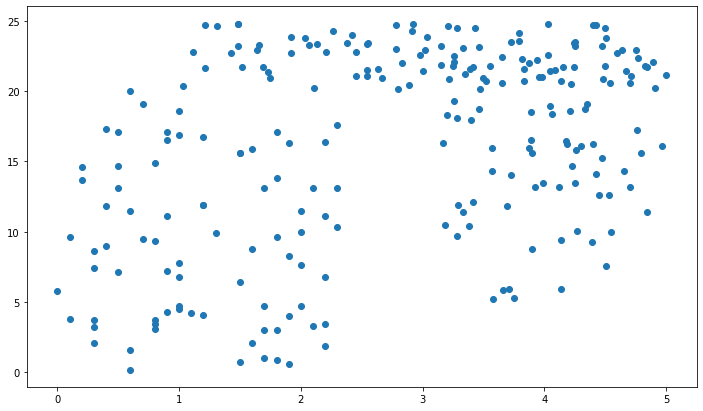

In [416]:
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(x_train[:,0],x_train[:,1])
plt.show()

There’s a little space between the two groups of data points. But closer to the center, it’s not clear which data point belongs to which class.

#### Fit a linear SVM

A linear curve might be a good candidate to separate these classes. So let’s fit the SVM 

In [417]:
svm_lin_clf = svm.SVC(kernel='linear',random_state=123456)
svm_lin_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=123456, shrinking=True,
    tol=0.001, verbose=False)

Dataset after classification, with decision boundary (full line)
margin (dashed lines) and support vectors marked with a circle.


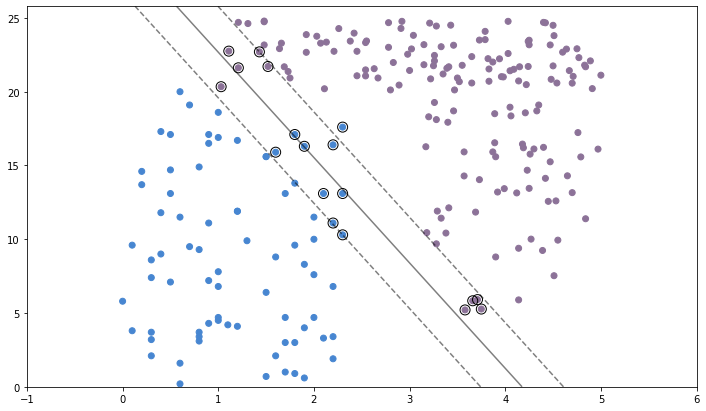

In [418]:
def plot_decision_boundaries(clf,features,x_train,y_train):
  fig, ax = plt.subplots(figsize=(12, 7))
  
  # Create grid to evaluate classifier
  xx = np.linspace(-1, max(features[:,0]) + 1, len(x_train))
  yy = np.linspace(0, max(features[:,1]) + 1, len(y_train))
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  
  # Assigning different colors to the classes
  colors = np.where(y_train == 1, '#8C7298', '#4786D1')
  
  # Plot the dataset
  ax.scatter(
      x_train[:,0],
      x_train[:,1],
      c=colors)
  
  # Get the separating hyperplane
  Z = clf.decision_function(xy).reshape(XX.shape)
  
  # Draw the decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', 
             levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  
  # Highlight support vectors with a circle around them
  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=100, linewidth=1, facecolors='none', edgecolors='k')
  
  print("Dataset after classification, with decision boundary (full line)")
  print("margin (dashed lines) and support vectors marked with a circle.")
  plt.show()

plot_decision_boundaries(svm_lin_clf,features,x_train,y_train)

If we calculate the accuracy of this model against the testing set we get a good result, granted the dataset is very small and generated at random.

In [419]:
print(f'accuracy: {accuracy_score(y_test, svm_lin_clf.predict(x_test))}')

accuracy: 0.9166666666666666


svm_lin_clf


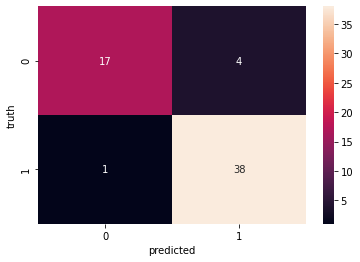

In [423]:
get_clf_cm("svm_lin_clf",svm_lin_clf,target_names,x_train,y_train,x_test,y_test)

#### Fit a quadratic SVM

The accuracy is good, but let's see if a more complex approach can return an even better result. To fit an SVM with a polynomial kernel we just need to update the kernel parameter.

In [424]:
svm_poly_clf = svm.SVC(kernel='poly', degree=2,random_state=123456)
svm_poly_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=123456, shrinking=True,
    tol=0.001, verbose=False)

Dataset after classification, with decision boundary (full line)
margin (dashed lines) and support vectors marked with a circle.


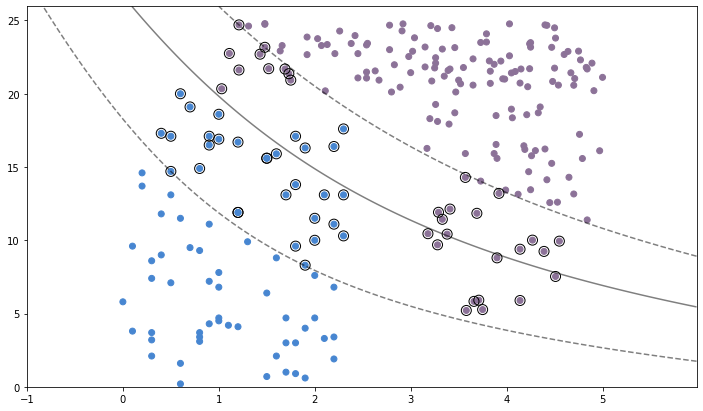

In [425]:
plot_decision_boundaries(svm_poly_clf,features,x_train,y_train)

In [426]:
print("accuracy")
for t in [("svm_lin_clf",svm_lin_clf),("svm_poly_clf",svm_poly_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

accuracy
svm_lin_clf: 0.9166666666666666
svm_poly_clf: 0.8333333333333334


So it turns out that for this problem a simpler model, an SVM with a linear kernel, was the best solution.

svm_lin_clf


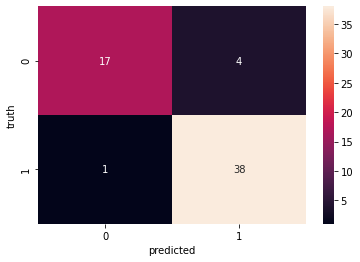

svm_poly_clf


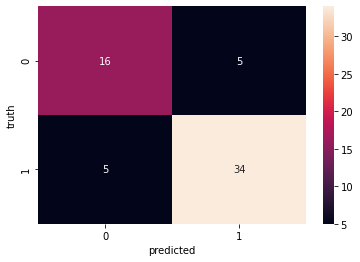

In [429]:
for t in [("svm_lin_clf",svm_lin_clf),("svm_poly_clf",svm_poly_clf)]:
  get_clf_cm(t[0],t[1],target_names,x_train,y_train,x_test,y_test)

### Exercise

Ok that was easy because we only did a binary classification lets
try our best again with our beloved iris dataset

In [430]:
iris=load_iris()

###### Solution

In [431]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target)

iris_clf = svm.SVC(kernel='linear')
iris_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [432]:
test_df=appply_clf(iris_clf,iris,x_test,y_test)
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_predicted
0,6.1,3.0,4.6,1.4,1,1
1,6.3,3.4,5.6,2.4,2,2
2,5.0,3.0,1.6,0.2,0,0
3,5.1,3.8,1.6,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [433]:
accuracy = accuracy_score(y_test, iris_clf.predict(x_test))
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.974


iris_clf


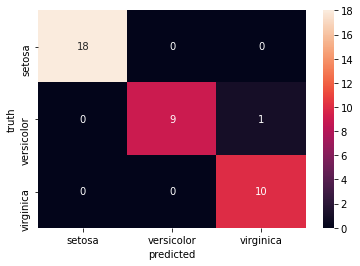

In [436]:
get_clf_cm("iris_clf",iris_clf,iris.target_names,x_train,y_train,x_test,y_test)

In [437]:
get_clf_performance("iris_clf",iris_clf,x_train,y_train,x_test,y_test)

iris_clf
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
#Bonus: Feature importance
def f_importances(coef, names):
    imp,names = zip(*sorted(zip(coef,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(iris_clf.coef_[0], iris.feature_names)

In [ ]:
"""
Note: Getting the feature importance in a non-linear SVM is impossible:
In linear SVM the resulting separating plane is in the same space as your input features. 
Therefore its coefficients can be viewed as weights of the input's "dimensions".
In other kernels, the separating plane exists in another space - a result of kernel transformation of the original space. 
Its coefficients are not directly related to the input space
"""